In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# 모든 경고 메시지 무시하기
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/BigProject/data/지원_모델링/'

Mounted at /content/drive


In [3]:
생태숲 = pd.read_excel(path + '통합데이터_생태숲타겟.xlsx')
생활숲 = pd.read_excel(path + '통합데이터_생활숲타겟.xlsx')
환경숲 = pd.read_excel(path + '통합데이터_환경숲타겟.xlsx')

# 적합성 = pd.read_excel('통합데이터_적합성.xlsx')
# 필요성 = pd.read_excel('통합데이터_필요성.xlsx')

# 숲 = pd.read_excel('통합데이터_타겟.xlsx')

In [4]:
# 확인
print('생태숲')
print(생태숲['target'].value_counts())

print('생활숲')
print(생활숲['target'].value_counts())

print('환경숲')
print(환경숲['target'].value_counts())


생태숲
target
0    194
1     12
Name: count, dtype: int64
생활숲
target
1    136
0     70
Name: count, dtype: int64
환경숲
target
0    120
1     86
Name: count, dtype: int64


# 1. 생태숲
- Augmentation을 적용해야 함

In [ ]:
생태숲.head()

,동,BOD,COD,TOC,SS,DO,T-P,총대장균군,분원성대장균군,암모니아성질소,...,일산화질소,이산화황,소득,평균_기온,최고_기온,최저_기온,강수총계,평균 풍속,최대 순간풍속,target
0,강서구 대저1동,2.203333,6.04,3.486667,7.063333,10.186667,0.076667,3632.526667,848.333333,0.116667,...,0.020,0.004,122000,15.542857,34.95,-4.721429,1634.357143,2.785714,22.792857,0
1,강서구 대저2동,1.990000,5.69,3.240000,5.185000,9.650000,0.060000,682.335000,312.085000,0.105000,...,0.020,0.004,122000,15.542857,34.95,-4.721429,1634.357143,2.785714,22.792857,0
2,강서구 강동동,3.990000,8.08,4.050000,16.150000,10.100000,0.090000,1860.000000,101.500000,0.090000,...,0.020,0.004,122000,15.542857,34.95,-4.721429,1634.357143,2.785714,22.792857,0
3,강서구 명지1동,4.665000,8.36,4.450000,17.125000,10.215000,0.100000,2673.335000,519.170000,0.230000,...,0.022,0.006,122000,15.542857,34.95,-4.721429,1634.357143,2.785714,22.792857,0
4,강서구 명지2동,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.022,0.006,122000,15.542857,34.95,-4.721429,1634.357143,2.785714,22.792857,0


In [ ]:
# 생태숲의 '동'열이 object이므로 인덱스로 옮김
생태숲.set_index('동', inplace=True)
생태숲.head()

,BOD,COD,TOC,SS,DO,T-P,총대장균군,분원성대장균군,암모니아성질소,질산성질소,...,일산화질소,이산화황,소득,평균_기온,최고_기온,최저_기온,강수총계,평균 풍속,최대 순간풍속,target
동,,,,,,,,,,,,,,,,,,,,,
강서구 대저1동,2.203333,6.04,3.486667,7.063333,10.186667,0.076667,3632.526667,848.333333,0.116667,1.943333,...,0.020,0.004,122000,15.542857,34.95,-4.721429,1634.357143,2.785714,22.792857,0
강서구 대저2동,1.990000,5.69,3.240000,5.185000,9.650000,0.060000,682.335000,312.085000,0.105000,1.445000,...,0.020,0.004,122000,15.542857,34.95,-4.721429,1634.357143,2.785714,22.792857,0
강서구 강동동,3.990000,8.08,4.050000,16.150000,10.100000,0.090000,1860.000000,101.500000,0.090000,1.860000,...,0.020,0.004,122000,15.542857,34.95,-4.721429,1634.357143,2.785714,22.792857,0
강서구 명지1동,4.665000,8.36,4.450000,17.125000,10.215000,0.100000,2673.335000,519.170000,0.230000,1.855000,...,0.022,0.006,122000,15.542857,34.95,-4.721429,1634.357143,2.785714,22.792857,0
강서구 명지2동,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.022,0.006,122000,15.542857,34.95,-4.721429,1634.357143,2.785714,22.792857,0


In [ ]:
# x, y 분할
target = 'target'
x = 생태숲.drop(target, axis=1)
y = 생태숲.loc[:, target]

In [ ]:
from sklearn.model_selection import train_test_split

# train, test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

# train, val
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.2, random_state=42)

## 1) **머신러닝**

## a. **RandomForest**

In [ ]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

# 모델 생성
model_RF = RandomForestClassifier()

# 훈련
model_RF.fit(x_train, y_train)

RandomForestClassifier()

#### val

In [ ]:
# 예측
y_pred_val = model_RF.predict(x_val)

# 정확도 평가 (val)
accuracy = accuracy_score(y_val, y_pred_val)
print("Validation 정확도:", accuracy)

Validation 정확도: 0.9696969696969697


Confusion_Matrix:
[[30  2]
 [ 1  0]]


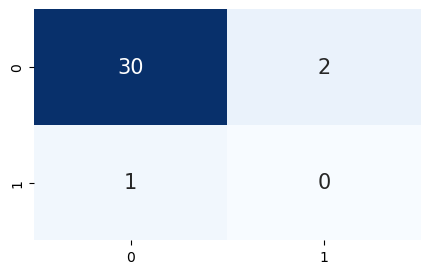

Classification Report - Validation Data
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.00      0.00      0.00         1

    accuracy                           0.91        33
   macro avg       0.48      0.47      0.48        33
weighted avg       0.94      0.91      0.92        33



In [ ]:
# confusion_matrix
cm_val = confusion_matrix(y_val, y_pred_val)

print('Confusion_Matrix:')
print(cm_val)

# 시각화
plt.figure(figsize=(5, 3))
sns.heatmap(cm_val,
            annot=True,
            cmap='Blues',
            cbar=False,
            annot_kws={'size': 15})
plt.show()

# Validation Data에 대한 Classification Report 출력
print("Classification Report - Validation Data")
print(classification_report(y_val, y_pred_val))

#### **test**

In [ ]:
# 예측
y_pred_test = model_RF.predict(x_test)

# 정확도 평가 (test)
y_pred_test = model_RF.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test 정확도:", accuracy_test)

Test 정확도: 0.9761904761904762


Confusion_Matrix:
[[40  1]
 [ 1  0]]


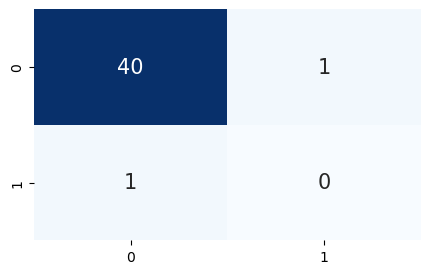

Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.00      0.00      0.00         1

    accuracy                           0.95        42
   macro avg       0.49      0.49      0.49        42
weighted avg       0.95      0.95      0.95        42



In [ ]:
# confusion_matrix
cm_test = confusion_matrix(y_test, y_pred_test)

print('Confusion_Matrix:')
print(cm_test)

# 시각화
plt.figure(figsize=(5, 3))
sns.heatmap(cm_test,
            annot=True,
            cmap='Blues',
            cbar=False,
            annot_kws={'size': 15})
plt.show()


# Test Data에 대한 Classification Report 출력
print("Classification Report - Test Data")
print(classification_report(y_test, y_pred_test))

### **a-1. RandomForest 파라미터 적용**

In [ ]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 모델 생성 및 하이퍼파라미터 설정
model_RF1 = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=42)

# 모델 훈련
model_RF1.fit(x_train, y_train)



RandomForestClassifier(max_depth=10, random_state=42)

#### val

In [ ]:
# val 예측
y_pred_val = model_RF1.predict(x_val)

# 정확도 평가 (validation)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation 정확도:", accuracy_val)

Validation 정확도: 0.9393939393939394


Confusion Matrix (Validation):
[[30  2]
 [ 1  0]]


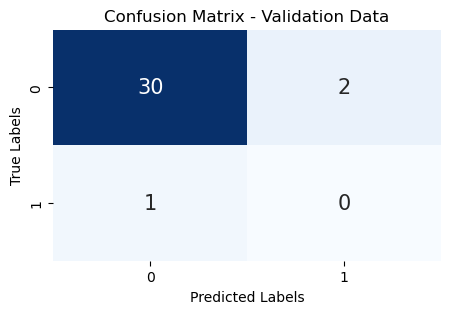

Classification Report - Validation Data
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.00      0.00      0.00         1

    accuracy                           0.91        33
   macro avg       0.48      0.47      0.48        33
weighted avg       0.94      0.91      0.92        33



In [ ]:
# confusion_matrix (validation)
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix (Validation):')
print(cm_val)

# confusion_matrix 시각화 (validation)
plt.figure(figsize=(5, 3))
sns.heatmap(cm_val, annot=True, cmap='Blues', cbar=False, annot_kws={'size': 15})
plt.title('Confusion Matrix - Validation Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# classification_report (validation)
print("Classification Report - Validation Data")
print(classification_report(y_val, y_pred_val))

#### test

In [ ]:
# 테스트 데이터에 대해 예측
y_pred_test = model_RF1.predict(x_test)

# 정확도 평가 (test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test 정확도:", accuracy_test)

Test 정확도: 0.9761904761904762


Confusion Matrix (Test):
[[40  1]
 [ 1  0]]


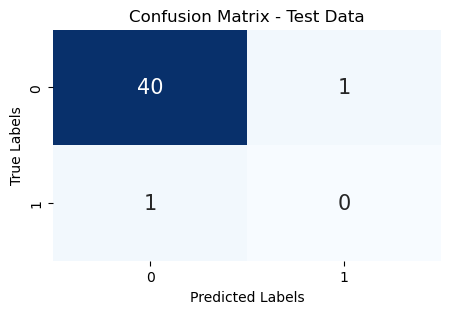

Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.00      0.00      0.00         1

    accuracy                           0.95        42
   macro avg       0.49      0.49      0.49        42
weighted avg       0.95      0.95      0.95        42



In [ ]:
# confusion_matrix (test)
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix (Test):')
print(cm_test)

# confusion_matrix 시각화 (test)
plt.figure(figsize=(5, 3))
sns.heatmap(cm_test, annot=True, cmap='Blues', cbar=False, annot_kws={'size': 15})
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# classification_report (test)
print("Classification Report - Test Data")
print(classification_report(y_test, y_pred_test))

### **a-2. GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

# RandomForest 모델 생성
model_RF_grid = RandomForestClassifier(random_state=42)

# 탐색할 하이퍼파라미터 조합 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=model_RF_grid, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# 훈련
grid_search.fit(x_train, y_train)


# 최적의 파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최적의 교차 검증 점수 (정확도):", grid_search.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
최적의 하이퍼파라미터: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}
최적의 교차 검증 점수 (정확도): 0.9237138830162085


#### val

In [ ]:
# 최적의 모델로 예측 및 평가 (검증 데이터)
best_model = grid_search.best_estimator_
y_pred_val = best_model.predict(x_val)

# 정확도 평가 (validation)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("\nValidation 정확도:", accuracy_val)


Validation 정확도: 0.9393939393939394


Confusion Matrix (Validation):
[[30  2]
 [ 1  0]]


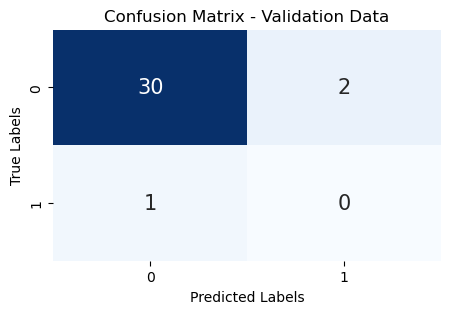


Classification Report - Validation Data
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.00      0.00      0.00         1

    accuracy                           0.91        33
   macro avg       0.48      0.47      0.48        33
weighted avg       0.94      0.91      0.92        33



In [ ]:
# confusion_matrix (validation)
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix (Validation):')
print(cm_val)

# confusion_matrix 시각화 (validation)
plt.figure(figsize=(5, 3))
sns.heatmap(cm_val, annot=True, cmap='Blues', cbar=False, annot_kws={'size': 15})
plt.title('Confusion Matrix - Validation Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# classification_report (validation)
print("\nClassification Report - Validation Data")
print(classification_report(y_val, y_pred_val))

#### test

In [ ]:
# 최적의 모델로 예측 및 평가 (테스트 데이터)
y_pred_test = best_model.predict(x_test)

# 정확도 평가 (test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nTest 정확도:", accuracy_test)


Test 정확도: 0.9523809523809523


Confusion Matrix (Test):
[[40  1]
 [ 1  0]]


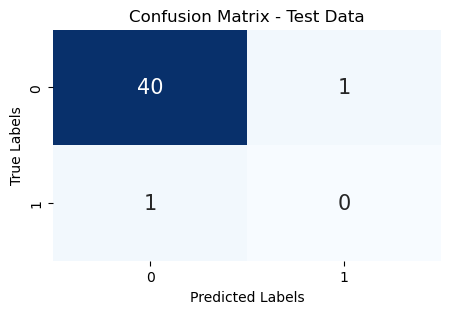


Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.00      0.00      0.00         1

    accuracy                           0.95        42
   macro avg       0.49      0.49      0.49        42
weighted avg       0.95      0.95      0.95        42



In [ ]:
# confusion_matrix (test)
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix (Test):')
print(cm_test)

# confusion_matrix 시각화 (test)
plt.figure(figsize=(5, 3))
sns.heatmap(cm_test, annot=True, cmap='Blues', cbar=False, annot_kws={'size': 15})
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# classification_report (test)
print("\nClassification Report - Test Data")
print(classification_report(y_test, y_pred_test))

## b. **XGBoost**

In [ ]:
# pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/a2/48/d5da8591891327b0faf08179d420fba3893c6134bdd449497c5329e4cb01/xgboost-2.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 682.7 kB/s eta 0:03:03
   ---------------------------------------- 0.1/124.9 MB 787.7 kB/s eta 0:02:39
   ---------------------------------------- 0.3/124.9 MB 2.4 MB/s eta 0:00:53
   ---------------------------------------- 0.6/124.9 MB 4.0 MB/s eta 0:00:32
   ---------------------------------------- 1.0/124.9 MB 4.7 MB/s eta 0:00:27
   ---------------------------------------- 1.3/124.9 MB 5.3 MB/s eta 0:00:24
    --------------------------------------- 1.7/124.9 MB 5.6 MB/s eta 0:00:22
    --------------------------------------- 2.1/124.9 MB 6.0 MB/s eta 0:00:21
    --------------------------------------- 2.4/124.9 MB 6.2 MB/s eta 0:00:20
    --------------

In [ ]:
# XGBoost
import xgboost as xgb
from xgboost import XGBClassifier

# XGBClassifier 모델 생성
model_XGB = XGBClassifier(random_state=42)

# 모델 훈련
model_XGB.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

#### val

In [ ]:
# 검증 데이터에 대해 예측
y_pred_val = model_XGB.predict(x_val)

# 정확도 평가 (validation)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation 정확도:", accuracy_val)

Validation 정확도: 0.9090909090909091


Confusion Matrix (Validation):
[[30  2]
 [ 1  0]]


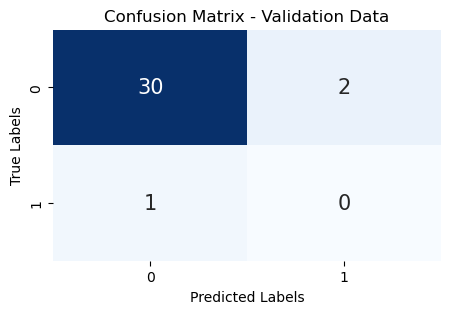


Classification Report - Validation Data
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.00      0.00      0.00         1

    accuracy                           0.91        33
   macro avg       0.48      0.47      0.48        33
weighted avg       0.94      0.91      0.92        33



In [ ]:
# confusion_matrix (validation)
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix (Validation):')
print(cm_val)

# confusion_matrix 시각화 (validation)
plt.figure(figsize=(5, 3))
sns.heatmap(cm_val, annot=True, cmap='Blues', cbar=False, annot_kws={'size': 15})
plt.title('Confusion Matrix - Validation Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# classification_report (validation)
print("\nClassification Report - Validation Data")
print(classification_report(y_val, y_pred_val))

#### test

In [ ]:
# 테스트 데이터에 대해 예측
y_pred_test = model_XGB.predict(x_test)

# 정확도 평가 (test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nTest 정확도:", accuracy_test)


Test 정확도: 0.9761904761904762


Confusion Matrix (Test):
[[41  0]
 [ 1  0]]


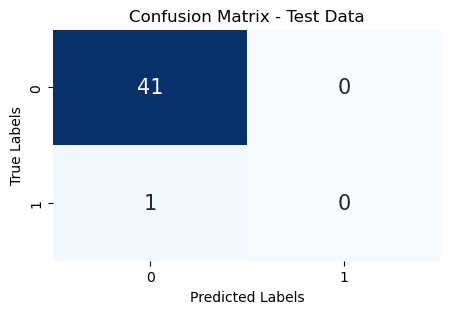


Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       0.00      0.00      0.00         1

    accuracy                           0.98        42
   macro avg       0.49      0.50      0.49        42
weighted avg       0.95      0.98      0.96        42



In [ ]:
# confusion_matrix (test)
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix (Test):')
print(cm_test)

# confusion_matrix 시각화 (test)
plt.figure(figsize=(5, 3))
sns.heatmap(cm_test, annot=True, cmap='Blues', cbar=False, annot_kws={'size': 15})
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# classification_report (test)
print("\nClassification Report - Test Data")
print(classification_report(y_test, y_pred_test))

### **b-1. 파라미터 적용**

#### val

#### test

### **b-2. GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

# XGBClassifier 모델 생성
model_XGB = XGBClassifier(random_state=42)

# GridSearchCV를 위한 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.3]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=model_XGB, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# 모델 훈련
grid_search.fit(x_train, y_train)

# 최적의 파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최적의 교차 검증 점수 (정확도):", grid_search.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
최적의 하이퍼파라미터: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
최적의 교차 검증 점수 (정확도): 0.9237138830162085


#### val

In [ ]:
# 최적의 모델로 예측 및 평가 (검증 데이터)
best_model = grid_search.best_estimator_
y_pred_val = best_model.predict(x_val)

# 정확도 평가 (validation)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("\nValidation 정확도:", accuracy_val)


Validation 정확도: 0.9696969696969697


Confusion Matrix (Validation):
[[32  0]
 [ 1  0]]


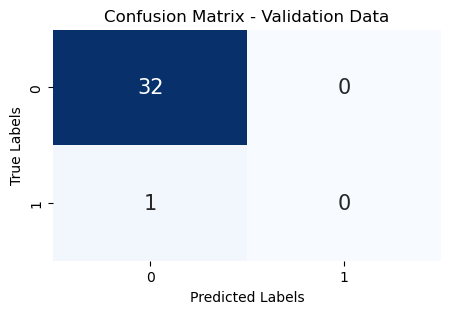


Classification Report - Validation Data
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       0.00      0.00      0.00         1

    accuracy                           0.97        33
   macro avg       0.48      0.50      0.49        33
weighted avg       0.94      0.97      0.95        33



In [ ]:
# confusion_matrix (validation)
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix (Validation):')
print(cm_val)

# confusion_matrix 시각화 (validation)
plt.figure(figsize=(5, 3))
sns.heatmap(cm_val, annot=True, cmap='Blues', cbar=False, annot_kws={'size': 15})
plt.title('Confusion Matrix - Validation Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# classification_report (validation)
print("\nClassification Report - Validation Data")
print(classification_report(y_val, y_pred_val))

#### test

In [ ]:
# 최적의 모델로 예측 및 평가 (테스트 데이터)
y_pred_test = best_model.predict(x_test)

# 정확도 평가 (test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nTest 정확도:", accuracy_test)


Test 정확도: 0.9761904761904762


Confusion Matrix (Test):
[[41  0]
 [ 1  0]]


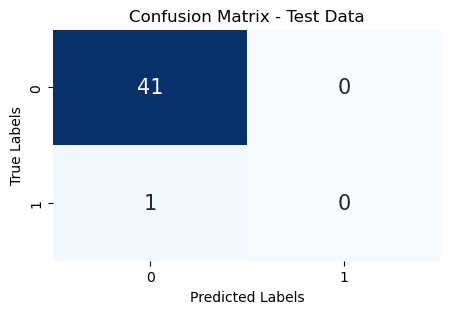


Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       0.00      0.00      0.00         1

    accuracy                           0.98        42
   macro avg       0.49      0.50      0.49        42
weighted avg       0.95      0.98      0.96        42



In [ ]:
# confusion_matrix (test)
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix (Test):')
print(cm_test)

# confusion_matrix 시각화 (test)
plt.figure(figsize=(5, 3))
sns.heatmap(cm_test, annot=True, cmap='Blues', cbar=False, annot_kws={'size': 15})
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# classification_report (test)
print("\nClassification Report - Test Data")
print(classification_report(y_test, y_pred_test))

## c. **SVM**

In [ ]:
# SVM
from sklearn.svm import SVC

#### val

#### test

### c-1. 파라미터 적용

#### val

#### test

### c-2. GridSearchCV

#### val

#### test

In [ ]:
# SVM 모델 생성
model_svm = SVC(kernel='rbf', C=1.0, gamma='scale')

# 모델 훈련
model_svm.fit(x_train, y_train)

# 검증 데이터에 대해 예측
y_pred_svm = model_svm.predict(x_valid)

# 정확도 평가
accuracy_svm = accuracy_score(y_valid, y_pred_svm)
print("Validation Accuracy (SVM):", accuracy_svm)

Validation Accuracy (SVM): 0.9761904761904762


In [ ]:
# GridSearchCV를 위한 하이퍼파라미터 조합 설정
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# SVM 모델 생성
model_svm = SVC()

# GridSearchCV를 이용하여 탐색
grid_search_svm = GridSearchCV(estimator=model_svm, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search_svm.fit(x_train, y_train)

# 최적의 파라미터 출력
print("Best Parameters (GridSearchCV - SVM):", grid_search_svm.best_params_)

# 최적의 모델로 예측
best_model_svm = grid_search_svm.best_estimator_
y_pred_svm_best = best_model_svm.predict(x_valid)

# 예측 성능 평가
accuracy_svm_best = accuracy_score(y_valid, y_pred_svm_best)
print("Validation Accuracy (Best SVM):", accuracy_svm_best)

Best Parameters (GridSearchCV - SVM): {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Validation Accuracy (Best SVM): 0.9761904761904762


## 2) 딥러닝

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 2. 생활숲

## 최적 모델 찾기

In [5]:
X = 생활숲.drop(columns=['동', 'target'])
y = 생활숲.loc[:, 'target']

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 여러 모델 import
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=5)),
    ('Random Forest', RandomForestClassifier(n_estimators=200, max_depth=5, random_state=24)),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]

results = []
names = []

for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    cv_results = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})"
    print(msg)

Logistic Regression: 0.6405 (0.0325)
Decision Tree: 0.5795 (0.0629)
Random Forest: 0.6830 (0.0407)
SVM: 0.6767 (0.0320)
KNN: 0.6769 (0.0447)


### RandomForestClassifier

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 클래스 가중치 계산
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}

# RandomForestClassifier 모델 생성
rf = RandomForestClassifier(class_weight=class_weights_dict)
# rf = RandomForestClassifier()

# 파라미터 그리드 설정
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [50, 100, 200, 300],
    'random_state': [24, 42, 52, 62]
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# 모델 학습
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델로 예측 및 평가
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

# 평가 결과 출력
print(classification_report(y_test, y_pred_best_rf))
print(confusion_matrix(y_test, y_pred_best_rf))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters found:  {'max_depth': 3, 'n_estimators': 100, 'random_state': 62}
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        14
           1       0.77      0.86      0.81        28

    accuracy                           0.74        42
   macro avg       0.71      0.68      0.69        42
weighted avg       0.73      0.74      0.73        42

[[ 7  7]
 [ 4 24]]


In [12]:
# RandomForestClassifier 모델 생성
rf = RandomForestClassifier(class_weight=class_weights_dict, max_depth=3, random_state=62)
# rf = RandomForestClassifier()

# 파라미터 그리드 설정
param_grid = {
    'n_estimators': range(85, 96),
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# 모델 학습
grid_search.fit(X_train_scaled, y_train)

# 최적의 파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델로 예측 및 평가
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

# 평가 결과 출력
print(classification_report(y_test, y_pred_best_rf))
print(confusion_matrix(y_test, y_pred_best_rf))

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best parameters found:  {'n_estimators': 87}
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        14
           1       0.77      0.86      0.81        28

    accuracy                           0.74        42
   macro avg       0.71      0.68      0.69        42
weighted avg       0.73      0.74      0.73        42

[[ 7  7]
 [ 4 24]]


- best_params: max_depth=3, n_estimators=87, random_state=62

### SVM

In [17]:
# GridSearchCV를 위한 하이퍼파라미터 조합 설정
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# SVM 모델 생성
model_svm = SVC()

# GridSearchCV를 이용하여 탐색
grid_search_svm = GridSearchCV(estimator=model_svm, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search_svm.fit(X_train_scaled, y_train)

# 최적의 파라미터 출력
print("Best Parameters (GridSearchCV - SVM):", grid_search_svm.best_params_)

# 최적의 모델로 예측
best_model_svm = grid_search_svm.best_estimator_
y_pred_svm_best = best_model_svm.predict(X_test_scaled)

# 평가 결과 출력
print(classification_report(y_test, y_pred_svm_best))
print(confusion_matrix(y_test, y_pred_svm_best))

Best Parameters (GridSearchCV - SVM): {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.57      0.57      0.57        14
           1       0.79      0.79      0.79        28

    accuracy                           0.71        42
   macro avg       0.68      0.68      0.68        42
weighted avg       0.71      0.71      0.71        42

[[ 8  6]
 [ 6 22]]


## 생활숲 최종모델

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

생활숲 = pd.read_excel(path + '통합데이터_생활숲타겟.xlsx')

X = 생활숲.drop(columns=['동', 'target'])
y = 생활숲.loc[:, 'target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 클래스 가중치 계산
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}

life_model = RandomForestClassifier(class_weight=class_weights_dict, max_depth=3, n_estimators=87, random_state=62)
life_model.fit(X_train_scaled, y_train)
y_pred_life = life_model.predict(X_test_scaled)

# 평가 결과 출력
print(classification_report(y_test, y_pred_life))
print(confusion_matrix(y_test, y_pred_life))

              precision    recall  f1-score   support

           0       0.64      0.50      0.56        14
           1       0.77      0.86      0.81        28

    accuracy                           0.74        42
   macro avg       0.71      0.68      0.69        42
weighted avg       0.73      0.74      0.73        42

[[ 7  7]
 [ 4 24]]


## 1) 머신러닝

### a. RandomForest

#### GridSearchCV

### b.XGBoost

#### GridSearchCV

### c. SVM

## 2) 딥러닝

# 3. 환경숲

## 1) 머신러닝

### a. RandomForest

#### GridSearchCV

### b.XGBoost

#### GridSearchCV

### c. SVM

## 2) 딥러닝